# Variações do Método de Euler

## Método de Euler Melhorado

O _Método de Euler Melhorado_ (MEM) é uma técnica numérica explícita de passo simples usada para resolver EDOs que modifica o método explícito de Euler. O MEM usa uma _inclinação ponderada_ com derivadas computadas em $t_i$ e $t_{i+1}$. No início do intervalo, a inclinação é 

$$\dfrac{dy}{dt}\Bigg|_{t = t_i} = f(t_i,y_i),$$

a mesma assumida no Método de Euler Explícito. Todavia, existe uma diferença fundamental na estimativa da inclinação em $t_{i+1}$. Primeiramente, um valor aproximado para $y_{i+1}$ é determinado como  

$$\tilde{y}_{i+1} = y_i + h f(t_i,y_i),$$ 

que corresponde à estimativa calculada pelo Método de Euler (reta com inclinação constante $f(t_i,y_i)$). Em seguida, usamos este valor para determinar uma nova inclinação que será usada para a integração da EDO, a saber: 

$$\dfrac{dy}{dt}\Bigg|_{t = t_{i+1}, y = \tilde{y}_{i+1}} = f(t_{i+1},\tilde{y}_i),$$

O valor $\tilde{y}_{i+1}$ é usado como um _preditor_. Então, dispondo dessas duas inclinações, uma inclinação ponderada pela média resulta da seguinte equação:

$$\overline{\dfrac{dy}{dt}}\Bigg|_{t = t_i} = \dfrac{1}{2}\left( \dfrac{dy}{dt}\Bigg|_{t = t_i} + \dfrac{dy}{dt}\Bigg|_{t = t_{i+1}, y = \tilde{y}_{i+1}} \right)$$


Por sua vez, construímos a _equação de correção_ (ou _corretor_) como: 

$$y_{i+1} = y_i + \phi(t_i,y_i)h = y_i + \frac{f(t_i,y_i) + f(t_{i+1},\tilde{y}_{i+1})}{2}h$$

Na realidade, o MEM é um algoritmo da família _preditor-corretor_. A rigor de notação, a aproximação para a solução do PVI é dada pelo processo iterativo a seguir:

\begin{align*}
w_0 &= \alpha \\
\tilde{w}_{i+1} &= w_i + h f(t_i,w_i) \\
		{w}_{i+1} &= w_i + \frac{h}{2}[f(t_i,w_i) + f(t_{i+1}, \tilde{w}_{i+1})], \quad i = 0,1,\dots,N-1.
\end{align*}

### Implementação computacional 

O seguinte código implementa o MEM:

In [1]:
from numpy import *

def euler_melh(t0,tf,y0,h,fun):
    """
    Resolve o PVI y' = f(t,y), t0 <= t <= tf, y(t0) = y0
    com passo h usando o metodo de Euler melhorado. 
    
    Entrada: 
        t0  - tempo inicial
        tf  - tempo final 
        y0  - condicao inicial 
        h   - passo 
        fun - funcao f(t,y) (anonima)
        
    Saida:
        t   - nos da malha numerica 
        y   - solucao aproximada
    """
    
    n = round((tf - t0)/h + 1)
    t = linspace(t0,t0+(n-1)*h,n)
    y = linspace(t0,t0+(n-1)*h,n)
    y = zeros((n,))
    
    y[0] = y0

    for i in range(1,n):        
        ytilde = y[i-1] + h*f(t[i-1],y[i-1])
        ymean = 0.5*( f(t[i-1],y[i-1]) + f(t[i],ytilde) )
        y[i] = y[i-1] + h*ymean                
    
    return (t,y)

### COPIA  

def euler_expl(t0,tf,y0,h,fun):
    """
    Resolve o PVI y' = f(t,y), t0 <= t <= tf, y(t0) = y0
    com passo h usando o metodo de Euler explicito. 
    
    Entrada: 
        t0  - tempo inicial
        tf  - tempo final 
        y0  - condicao inicial 
        h   - passo 
        fun - funcao f(t,y) (anonima)
        
    Saida:
        t   - nos da malha numerica 
        y   - solucao aproximada
    """
    
    n = round((tf - t0)/h + 1)
    t = linspace(t0,t0+(n-1)*h,n)
    y = linspace(t0,t0+(n-1)*h,n)
    y = zeros((n,))
    
    y[0] = y0

    for i in range(1,n):
        y[i] = y[i-1] + h*f(t[i-1],y[i-1])

    return (t,y)

O exemplo a seguir é o mesmo que resolvemos com o Método de Euler Explícito.

**Exemplo:** Resolva numericamente

$$\begin{cases}
y'(t) = \frac{y(t) + t^2 - 2}{t+1}\\
y(0) = 2 \\
0 \le t \le 6 \\ 
h = 0.5
\end{cases}$$

Defina $y_{mem}(t)$ como a solução numérica obtida pelo método de Euler melhorado e $y_{mee}(t)$ como a solução numérica obtida pelo método de Euler explícito. Plote o gráfico das funções aproximadas juntamente com o da solução exata $y(t) = t^2 + 2t + 2 - 2(t+1)\ln(t+1)$

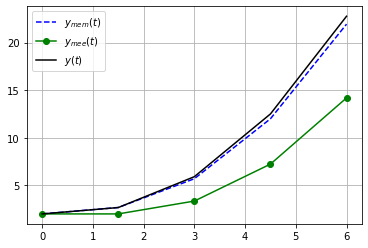

In [2]:
import matplotlib.pyplot as plt 

# define funcao
f = lambda t,y: (y + t**2 - 2)/(t+1)

# invoca metodo
t0 = 0.0
tf = 6.0
y0 = 2.0
h = 1.5
t,ymem = euler_melh(t0,tf,y0,h,f)
t,ymee = euler_expl(t0,tf,y0,h,f)

# plota funcoes 
yex = t**2 + 2*t + 2 - 2*(t+1)*log(t+1)
plt.plot(t,ymem,'b--',label='$y_{mem}(t)$')
plt.plot(t,ymee,'go-',label='$y_{mee}(t)$')
plt.plot(t,yex,'k',label='$y(t)$')
plt.grid(True)
plt.legend()

## Método do Ponto Médio (ou Ponto Central)

O _Método do Ponto Médio_ (MPM) é outra variação do Método de Euler e sua dedução é feita de maneira semelhante à anterior. Neste caso, a inclinação utilizada para o avanço é calculada no ponto médio $t_{i+1/2}$ do passo discreto e dada pela expressão 

$$\dfrac{dy}{dt}\Bigg|_{t = t_i + 1/2} = f( t_{i + 1/2}, y_{i+1/2})$$

O MPM pode ser formalmente escrito pelo processo iterativo: 

\begin{align*}
w_0 &= \alpha \\ 
t_m &= t_i + \frac{h}{2} \\
w_m &= w_i + \frac{h}{2} f(t_i,w_i) \\
w_{i+1} &=w_i + h f(t_m, w_m), \quad i = 0,1,\dots,N-1
\end{align*}

O MPM é assim chamado pela relação com a fórmula de quadratura de mesmo nome. Juntamente com o MEM, exige maior esforço computacional, mas são recompensados com redução de erro e melhor acurácia. Além disso, ambos são casos particulares da família de métodos de Runge-Kutta. 

**Exercício:** usando os códigos anteriores como bases, implemente o método do Ponto Médio com o Python. 